**Esercitazione 6 - Pandas**

In questa esercitazione, andremo a vedere un semplice esempio di utilizzo di Pandas.

In [69]:
import pandas as pd
import seaborn as sns

**Lettura di un dataframe**

Leggiamo il dataset relativo al Titanic, e mostriamone le prime cinque righe.

In [70]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Lettura di una serie**

Estraiamo la serie contenente tutte le tariffe pagate dai passeggeri.

In [71]:
fares = titanic['fare']
fares.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: fare, dtype: float64

**Accesso ai dati: le funzioni `loc()` ed `iloc()`**

Mostriamo a schermo la tariffa del primo passeggero nell'elenco.

In [72]:
titanic.loc[0, 'fare']

7.25

Possiamo anche accedere in scrittura ad un attributo. In questo caso, usiamo `loc()`, ma per farlo possiamo usare anche `iloc()`:

In [73]:
titanic.loc[0, 'fare'] = 8

Accediamo all'interno dato mediante la funzione `loc()`:

In [74]:
titanic.loc[0, :]      # Lo slicing può essere omesso

survived                 0
pclass                   3
sex                   male
age                   22.0
sibsp                    1
parch                    0
fare                   8.0
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 0, dtype: object

**Slicing**

Proviamo ad accedere ai passeggeri che vanno dal secondo al quinto. Con `iloc()`, facciamo uno slicing vero e proprio, simile a quello fatto con NumPy, per cui:

In [75]:
titanic.iloc[2:5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


Se proviamo invece ad utilizzare loc, agiremo sugli indici, prendendo tutti i valori che sono compresi tra gli indici considerati:

In [76]:
titanic.loc[2:5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


Possiamo fare lo slicing anche sulle feature:

In [77]:
titanic.iloc[2:5, 2:5]

,sex,age,sibsp
2,female,26.0,0
3,female,35.0,1
4,male,35.0,0


In [78]:
titanic.loc[2:5, 'sex':'sibsp']

,sex,age,sibsp
2,female,26.0,0
3,female,35.0,1
4,male,35.0,0
5,male,NaN,0


**Aggiunta di una feature e di un campione**

Vediamo come aggiungere una nuova colonna ad un dataframe. In particolare, creiamo un dataframe fatto da un'unica colonna di numeri interi, ed aggiungiamovene un'altra pari esattamente al doppio della prima.

In [79]:
df = pd.DataFrame([1,2,3,4,5], columns=['one'])     
df['two'] = df['one'] * 2
df

,one,two
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


La stessa operazione può essere effettuata con il metodo `concat()`, che accetta, tra i vari parametri, la lista dei dataframe da concatenare e l'asse sul quale effettuare l'operazione. In particolare, proviamo ad effettuarla aggiungendo prima una colonna:

In [80]:
df_three = pd.DataFrame(df['one'] * 3)
df_new_col = pd.concat([df, df_three], axis=1)
df_new_col.columns = ['one', 'two', 'three']
df_new_col

,one,two,three
0,1,2,3
1,2,4,6
2,3,6,9
3,4,8,12
4,5,10,15


e poi una riga:

In [81]:
df_add = pd.DataFrame([[6, 12, 18]], columns=['one', 'two', 'three']) 
df_last = pd.concat([df_new_col, df_add])
# Il comportamento delle due righe seguenti è riassunto da ignore_index=True
df_last.reset_index(inplace=True)
df_last.drop(['index'], axis=1, inplace=True)
df_last

,one,two,three
0,1,2,3
1,2,4,6
2,3,6,9
3,4,8,12
4,5,10,15
5,6,12,18


**Selezione di dati**

Proviamo adesso a selezionare un insieme di dati basandoci su delle regole.

In [82]:
men = titanic[(titanic['age'] > 18) & (titanic['sex'] == 'male')]
men.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,8.0000,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False


**Descrizione del dataset**

Usiamo la funzione `describe()` per descrivere il dataset.

In [83]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.205050
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693012
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Visualizzazione dei dati**

Visualizziamo in ultimo a schermo due istogrammi che descrivano l'età ed il sesso dei passeggeri.

<Axes: >

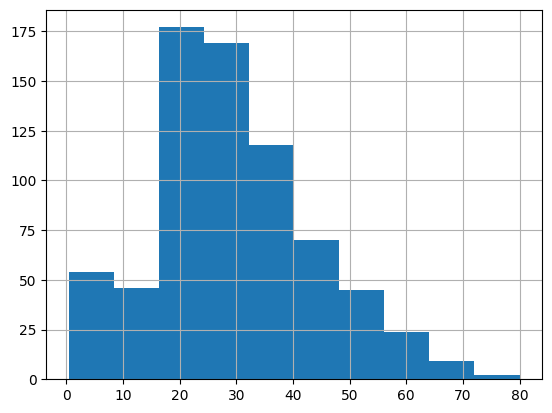

In [84]:
titanic['age'].hist()

<Axes: >

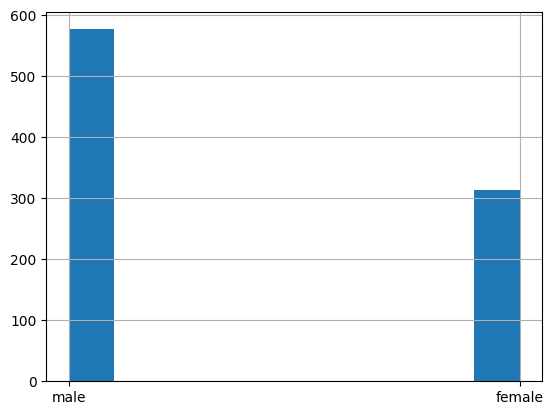

In [85]:
titanic['sex'].hist()

L'API di plot è comunque molto più estesa di quanto mostrato finora. Per esempio, possiamo effettuare lo scatter plot dell'età rispetto alla tariffa pagata:

<Axes: xlabel='age', ylabel='fare'>

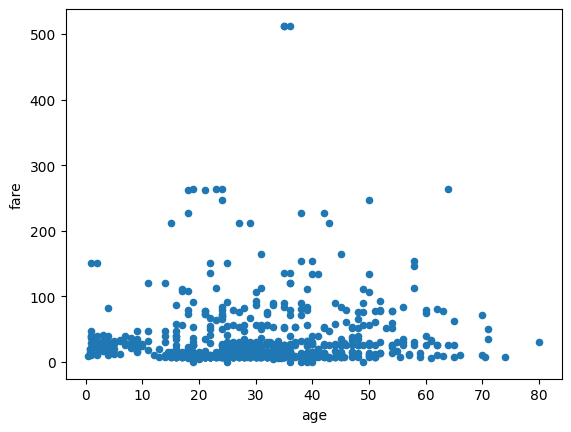

In [86]:
titanic.plot('age', 'fare', kind='scatter')

Possiamo anche estendere l'analisi più feature:

<Axes: >

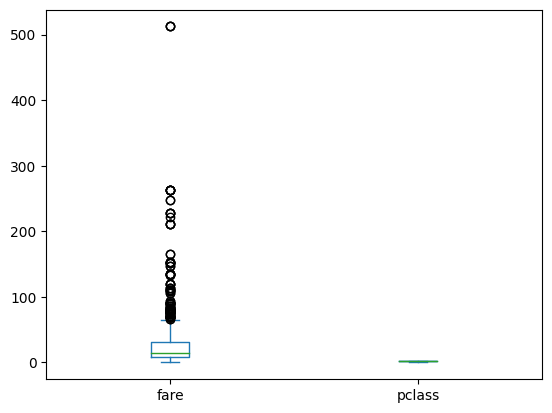

In [87]:
titanic.plot(x='age', y=['fare', 'pclass'], kind='box')